In [1]:
import json
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pickle as pk

In [2]:
path_git = 'd:/Git_Proyects/Tesis/Base_Twitter/'

nombre = 'kici'

kici_oct = pd.read_csv(path_git+'Tweets_'+nombre+'_oct.csv')
clusters = pk.load(open(path_git+nombre+'_clusters_75_oct.pk', 'rb'))

frases = list(kici_oct['Tweets_sin_url'])
cluster_map = {frases[j]: str(i+1) for i, clus in enumerate(clusters) for j in clus}
kici_oct['cluster'] = kici_oct['Tweets_sin_url'].map(cluster_map)
kici_oct['RT'] = False

In [3]:
clus_3 = kici_oct[kici_oct['cluster'] == '3']
clus_3

,Unnamed: 0,Tweets,Fecha,urls,verified,Tweets_sin_url,cluster,RT
5390,5390,"Axel Kicillof: ""Ahora hay gente que se dedica ...",Mon Oct 07 02:33:55 +0000 2019,https://t.co/NVpIE0JZaj,True,"Axel Kicillof: ""Ahora hay gente que se dedica ...",3,False
5434,5434,"Axel Kicillof: ""Ahora hay gente que se dedica ...",Mon Oct 07 02:48:17 +0000 2019,https://t.co/r3iSiR0uw0,False,"Axel Kicillof: ""Ahora hay gente que se dedica ...",3,False
5440,5440,La sinceridad de esta frase desnuda la complic...,Mon Oct 07 02:47:24 +0000 2019,https://t.co/aRe9GCku20,False,La sinceridad de esta frase desnuda la complic...,3,False
5464,5464,Para Kicillof: “Ahora hay gente que se dedica ...,Mon Oct 07 02:53:48 +0000 2019,0,False,Para Kicillof: “Ahora hay gente que se dedica ...,3,False
5475,5475,"Axel Kicillof: ""Ahora hay gente que se dedica ...",Mon Oct 07 02:55:18 +0000 2019,https://t.co/EOyDnSRgIb,False,"Axel Kicillof: ""Ahora hay gente que se dedica ...",3,False
...,...,...,...,...,...,...,...,...
25980,25980,"🇦🇷 ✌️ 🤮 💩 \nAxel Kicillof: ""Hay gente que se ...",Tue Oct 15 15:09:01 +0000 2019,https://t.co/5NieuqiHT4,False,"🇦🇷 ✌️ 🤮 💩 \nAxel Kicillof: ""Hay gente que se ...",3,False
27563,27563,"🇦🇷 ✌️ 🤮 💩 \nAxel Kicillof: ""Hay gente que se ...",Wed Oct 16 18:24:17 +0000 2019,https://t.co/5NieuqiHT4,False,"🇦🇷 ✌️ 🤮 💩 \nAxel Kicillof: ""Hay gente que se ...",3,False
34928,34928,"Axel Kicillof: ""La gente se dedica a vender dr...",Thu Oct 24 19:07:10 +0000 2019,https://t.co/wL3QMz2SU8,False,"Axel Kicillof: ""La gente se dedica a vender dr...",3,False
34930,34930,"Axel Kicillof: ""La gente se dedica a vender dr...",Thu Oct 24 19:13:28 +0000 2019,https://t.co/tmiaKmZBj4,False,"Axel Kicillof: ""La gente se dedica a vender dr...",3,False


In [4]:
import json

filename = 'd:/Facultad/Tesis/Twitter/201910-kicillof.txt'
tweets_cluster = set(list(clus_3['Tweets']))

# Crea un diccionario para almacenar los tweets originales y sus retweets asociados
retweets_dict = {tweet: [] for tweet in tweets_cluster}

retweets_data = []
with open(filename, 'r', encoding='utf8') as fp:
    for i, line in enumerate(fp):
        json_data = json.loads(line)
        tweet = json_data['text']
        if tweet.startswith('RT'):
            try:
                original_tweet = json_data['retweeted_status']['full_text']
                if original_tweet in tweets_cluster:
                    retweets_dict[original_tweet].append(tweet)
                    filt = clus_3['Tweets'] == original_tweet
                    verifide = clus_3[filt]['verified'].tolist()[0]
                    retweets_data.append({
                        "Tweets": original_tweet,
                        "Fecha": json_data['created_at'],
                        "urls": 0,
                        "verified": verifide,
                        "Tweets_sin_url": original_tweet,
                        "cluster": '3',
                        "RT": True
                    })               
            except KeyError:
                pass
        

In [5]:
clus_3.drop(columns=['Unnamed: 0'], inplace=True)
list(clus_3['Tweets'])[20:100]


C:\Users\Ale\AppData\Local\Temp\ipykernel_17164\3509925959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clus_3.drop(columns=['Unnamed: 0'], inplace=True)


['Axel Kicillof: "Ahora hay gente que se dedica a vender droga porque se quedó sin laburo".\n\nNo estigmaticemos a los narcos, pobre gente.\n\n  https://t.co/QmiNA0UrRe …',
 'Axel Kicillof: “Hay gente que se dedica a vender droga porque se quedó sin laburo” https://t.co/wVqpb0mBzB',
 'Axel Kicillof: “Hay gente que se dedica a vender droga porque se quedó sin laburo”  https://t.co/2kiHbvy5Ab',
 '#EstoVotaste \nAxel Kicillof: "Ahora hay gente que se dedica a vender droga porque se quedó sin laburo" - https://t.co/xkfP43fZrI',
 'Axel Kicillof: "Ahora hay gente que se dedica a vender droga porque se quedó sin laburo".\n\nCorta la bocha: Vidal o los Narcos.',
 'Axel Kicillof: "Ahora hay gente que se dedica a vender droga porque se quedó sin laburo" https://t.co/cqslCEbeSF',
 'Axel Kicillof: “Hay gente que se dedica a vender droga porque se quedó sin laburo”  https://t.co/G5FItrcRou',
 '😂😂😂Axel Kicillof: "Ahora hay gente que se dedica a vender droga porque se quedó sin laburo" https://t.co/o

In [6]:
len(retweets_data)
df_RT = pd.DataFrame(retweets_data)
clus_3_completo = pd.concat([clus_3, df_RT], ignore_index=True)
#clus_3_completo

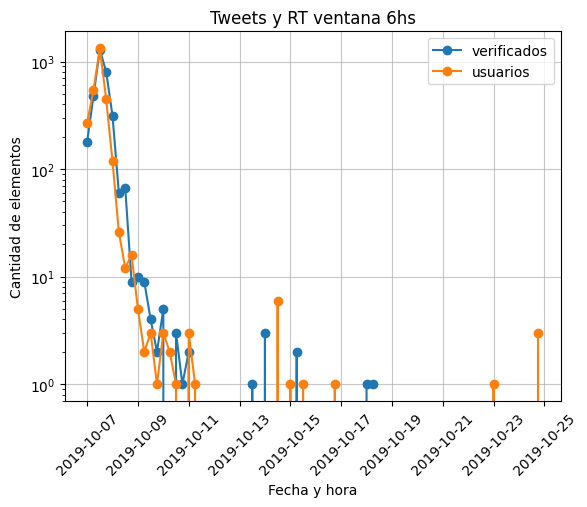

In [8]:
clus_3_completo['Fecha'] = pd.to_datetime(clus_3_completo['Fecha'], format='%a %b %d %H:%M:%S +0000 %Y')
horas = '6H'
#ventana_temporal = pd.offsets.Hour(horas)
clus_3_verifide =  clus_3_completo[clus_3_completo['verified']== True]
clus_3_user =  clus_3_completo[clus_3_completo['verified']== False]

dos_tipos =[clus_3_verifide, clus_3_user]
names = ['verificados', 'usuarios']
plt.figure()

for i, tipos in enumerate(dos_tipos):
    df_grouped = tipos.groupby(pd.Grouper(key='Fecha', freq=horas)).size().reset_index(name='count')
    plt.plot(df_grouped['Fecha'], df_grouped['count'], marker='o', linestyle='-', label = names[i])

# df_grouped = clus_3_completo.groupby(pd.Grouper(key='Fecha', freq=horas)).size().reset_index(name='count')
# plt.plot(df_grouped['Fecha'], df_grouped['count'], marker='o', linestyle='-', label = 'completo')
plt.title("Tweets y RT ventana 6hs")
plt.xlabel('Fecha y hora')
plt.ylabel('Cantidad de elementos')
#plt.xlim([datetime(2019, 10, 26), datetime(2019, 10, 30)])
plt.yscale('log')
plt.legend()
plt.grid(alpha = 0.7)
plt.xticks(rotation=45)
plt.show()